$$\lambda_p=S+A_1p+A_2p^2+A_3p^3$$

In [3]:
import math
import numpy as np
from lmfit import models
from scipy.optimize import fsolve
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

De data is gegeven in een csv bestand genaamd cal 16-6.csv

In [4]:
# ik wil de data als figuur plotten net zoals op de oscilloscoop, maar is nog niet gelukt
dataset= open(r'C:\Users\mexro\Downloads\cal 16-6.csv')
x_as=[]
y_as=[]
for line in dataset:
    data_opgeknipt = line.split(',')
    x_as.append(data_opgeknipt[0])
    y_as.append(data_opgeknipt[1])
plt.plot(x_as,y_as)
plt.show()

KeyboardInterrupt: 

In [ ]:
lamda_p=[585.25,614.31,640.23,650.75]
lamda_p = np.array(lamda_p)
lamda_p_error=[0.1,2,2,5]
lamda_p_error = np.array(lamda_p_error)
lamda_p_weight = 1/(np.array(lamda_p_error))
p=[1736.72,2198.79,2756.45,2968.9]
p=np.array(p)
p_error=[18,20,20,20]
p_error = np.array(p_error)
p_weight =1/(np.array(p_error))

In [ ]:
df = pd.DataFrame({'lamda_p': lamda_p,
                    'lamda_weight':lamda_p_weight,
                    'p':p,
                    'p_weight':p_weight})
df

,lamda_p,lamda_weight,p,p_weight
0,585.25,10.0,1736.72,0.055556
1,614.31,0.5,2198.79,0.050000
2,640.23,0.5,2756.45,0.050000
3,650.75,0.2,2968.90,0.050000


optimsing with scipy

(0.0, 700.0)

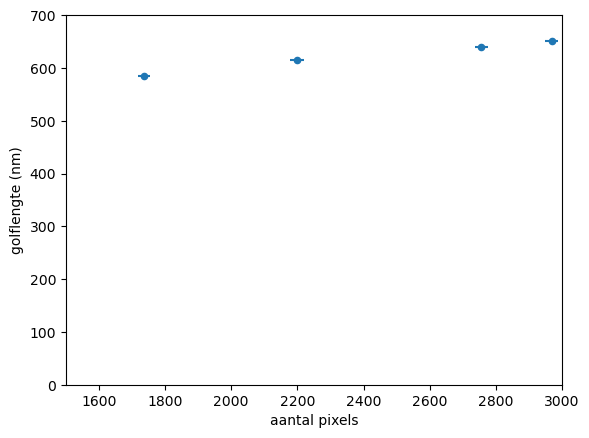

In [ ]:
ax = df.plot.scatter('p', 'lamda_p',xerr=p_error,yerr=lamda_p_error)

# Set axis labels
ax.set_xlabel('aantal pixels')
ax.set_ylabel('golflengte (nm)')

# Set axis view limits
ax.set_xlim(1500, 3000)
ax.set_ylim(0, 700)

In [ ]:
def formule(p,S,A_1,A_2,A_3):
    return S+ A_1 *p + A_2*p**2 +A_3*p**3 
curve_model= models.Model(formule)


In [ ]:
fit_result=curve_model.fit(df['lamda_p'],p=df['p'], S=230,A_1=0.4,A_2=0.0001,A_3=0.000000001)

In [ ]:
fit_result

In [ ]:
fit_result.params

name,value,standard error,relative error,initial value,min,max,vary
S,243.395505,1.5092e-11,(0.00%),230,-inf,inf,True
A_1,0.36473827,2.0140e-14,(0.00%),0.4,-inf,inf,True
A_2,-1.2492e-04,8.7829e-18,(0.00%),0.0001,-inf,inf,True
A_3,1.6262e-08,1.2530e-21,(0.00%),1e-09,-inf,inf,True


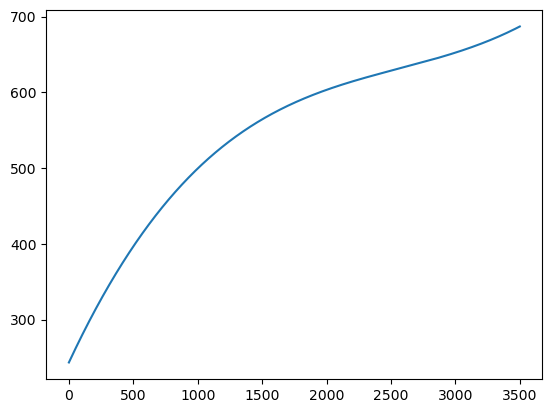

In [ ]:
pixel_list=np.linspace(0,3500,3500)
wavelength_list = [formule(i,243.395505,0.36473827,-1.2492*10**-4,1.6262*10**-8) for i in pixel_list]
plt.plot(pixel_list,wavelength_list)


Text(0.5, 1.0, '')

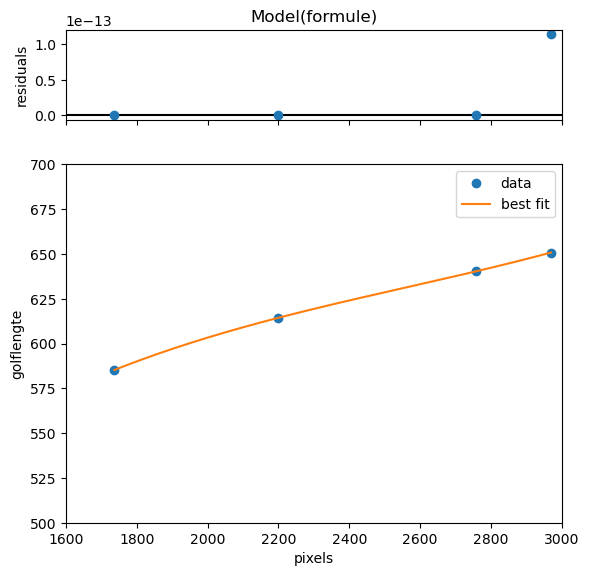

In [ ]:
# plot fit including residuals
fit_result.plot(numpoints=1000)

# Set axis labels
plt.xlabel('pixels')
plt.ylabel('golflengte')

# Set axis view limits
plt.xlim(1600, 3000)
plt.ylim(500, 700)

# Remove title
plt.title(None)
